In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kresnaprayoga","key":"85d67bd71378f9e436d214702f5c0059"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d nelgiriyewithana/apple-quality

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality
License(s): other
  0% 0.00/170k [00:00<?, ?B/s]
100% 170k/170k [00:00<00:00, 18.8MB/s]


In [4]:
!unzip apple-quality.zip -d apple-quality
!ls apple-quality

Archive:  apple-quality.zip
  inflating: apple-quality/apple_quality.csv  
apple_quality.csv


In [23]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [6]:
df = pd.read_csv("/content/apple-quality/apple_quality.csv")
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [7]:
df.Quality[df.Quality == 'bad'] = 0
df.Quality[df.Quality == 'good'] = 1

<ipython-input-7-c9493459cbed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Quality[df.Quality == 'bad'] = 0
<ipython-input-7-c9493459cbed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Quality[df.Quality == 'good'] = 1


In [8]:
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')
df['Acidity'].fillna(0, inplace=True)
df['Quality'].fillna(0, inplace=True)

In [9]:
df.drop(columns=['A_id'], inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4001 non-null   float64
 7   Quality      4001 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 250.2 KB


In [11]:
X = df.drop("Quality", axis=1)
Y = df["Quality"]
X = X.astype(np.float32)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [13]:
Y_train = Y_train.astype(np.float32)
Y_test = Y_test.astype(np.float32)

In [14]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(7,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1345 (5.25 KB)
Trainable params: 1345 (5.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

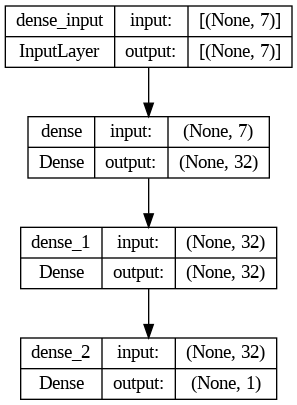

In [17]:
plot_model(model, show_shapes = True)

In [18]:
result = model.fit(X_train, Y_train, epochs = 150, batch_size = 10)

Epoch 1/150
300/300 [==============================] - 1s 2ms/step - loss: 0.5584 - accuracy: 0.7170
Epoch 2/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4366 - accuracy: 0.8053
Epoch 3/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3880 - accuracy: 0.8293
Epoch 4/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3588 - accuracy: 0.8400
Epoch 5/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3402 - accuracy: 0.8530
Epoch 6/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3267 - accuracy: 0.8587
Epoch 7/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3161 - accuracy: 0.8660
Epoch 8/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3081 - accuracy: 0.8670
Epoch 9/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3013 - accuracy: 0.8687
Epoch 10/150
300/300 [==============================] - 1s 2ms/step - loss: 0.2960 - accura

In [19]:
model.evaluate(X_test, Y_test)

32/32 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.9341


[nan, 0.9340659379959106]

In [20]:
model.save('./apple.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
model = tf.keras.models.load_model('./apple.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./apple.tflite", "wb").write(tflite_model)

4472